In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

## 2. Carga del dataset

https://www.kaggle.com/datasets/zsinghrahulk/covertype-forest-cover-types/code

In [4]:
df = pd.read_csv("covertype.csv")  # El archivo original se llama "train.csv"
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Unnamed: 0                          581012 non-null  int64
 1   Unnamed: 1                          581012 non-null  int64
 2   Unnamed: 2                          581012 non-null  int64
 3   Elevation                           581012 non-null  int64
 4   Aspect                              581012 non-null  int64
 5   Slope                               581012 non-null  int64
 6   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 7   Vertical_Distance_To_Hydrology      581012 non-null  int64
 8   Horizontal_Distance_To_Roadways     581012 non-null  int64
 9   Hillshade_9am                       581012 non-null  int64
 10  Hillshade_Noon                      581012 non-null  int64
 11  Hillshade_3pm                       581012 non-null 

## 3.Data Cleaning

In [5]:
df[['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2']].head()


,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,2596,51,3
1,2590,56,2
2,2804,139,9
3,2785,155,18
4,2595,45,2


In [6]:
df.drop(columns=['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'], inplace=True)


## 4.Data Exploration

 *Verificar la distribución de la variable objetivo (Cover_Type)* 
 *It’s useful to check how many observations there are per forest cover type*

In [7]:
df['Cover_Type'].value_counts().sort_index()


Cover_Type
1    211840
2    283301
3     35754
4      2747
5      9493
6     17367
7     20510
Name: count, dtype: int64

2. Separar características y etiqueta | Separate features and label

In [8]:
X = df.drop("Cover_Type", axis=1)
y = df["Cover_Type"]


3. Dividir datos en entrenamiento y prueba | Split into train and test

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 4. **Entrenar un modelo de k vecinos más cercanos utilizando todas las variables descriptivas.**  
   **Train a k-nearest neighbors model using all the descriptive variables.**


In [10]:

# ES: Dividir datos en entrenamiento y prueba
# EN: Split data into training and testing sets
from sklearn.model_selection import train_test_split

X = df.drop("Cover_Type", axis=1)  # Reemplaza "target" con el nombre de tu variable objetivo
y = df["Cover_Type"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [18]:
# ES: Reducir el tamaño de los datos para evitar lentitud
# EN: Reduce dataset size to avoid slowness

X_train_sample = X_train[:5000]
y_train_sample = y_train[:5000]
X_test_sample = X_test[:1000]
y_test_sample = y_test[:1000]

# ES: Búsqueda del mejor valor de k
# EN: Search for the best k value

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

best_k = 1
best_score = 0

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_sample, y_train_sample)
    y_pred = knn.predict(X_test_sample)
    acc = accuracy_score(y_test_sample, y_pred)
    
    if acc > best_score:
        best_score = acc
        best_k = k

print(f"Mejor valor de k / Best k: {best_k} con exactitud / with accuracy: {best_score:.4f}")


Mejor valor de k / Best k: 1 con exactitud / with accuracy: 0.5820


In [19]:
# ES: Entrenar el modelo KNN con el mejor valor de k
# EN: Train KNN model with best k

knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train_sample, y_train_sample)
y_pred_knn = knn_final.predict(X_test_sample)

# ES: Evaluar
# EN: Evaluate
acc_knn = accuracy_score(y_test_sample, y_pred_knn)
report_knn = classification_report(y_test_sample, y_pred_knn)

print(f"Exactitud del modelo KNN / Accuracy of KNN model: {acc_knn:.4f}")
print("Reporte de clasificación KNN / KNN Classification Report:")
print(report_knn)


Exactitud del modelo KNN / Accuracy of KNN model: 0.5820
Reporte de clasificación KNN / KNN Classification Report:
              precision    recall  f1-score   support

           1       0.56      0.56      0.56       353
           2       0.64      0.66      0.65       483
           3       0.55      0.53      0.54        74
           4       0.00      0.00      0.00         2
           5       0.50      0.29      0.36        21
           6       0.30      0.26      0.28        35
           7       0.34      0.41      0.37        32

    accuracy                           0.58      1000
   macro avg       0.41      0.38      0.39      1000
weighted avg       0.58      0.58      0.58      1000



## 5. **Entrenar un modelo de árboles de decisión utilizando todas las variables descriptivas.**  
**Train a decision tree model using all the descriptive variables.**


In [12]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

5. Evaluar el modelo | Evaluate the model

In [23]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# ES: Reporte de clasificación del árbol de decisión
# EN: Classification report for the decision tree

from sklearn.metrics import classification_report

print("Reporte de clasificación / Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9092390306590784
Reporte de clasificación / Classification Report:
              precision    recall  f1-score   support

           1       0.91      0.91      0.91     63556
           2       0.92      0.92      0.92     85078
           3       0.91      0.90      0.91     10638
           4       0.78      0.78      0.78       795
           5       0.79      0.77      0.78      2941
           6       0.83      0.84      0.83      5227
           7       0.92      0.93      0.93      6069

    accuracy                           0.91    174304
   macro avg       0.86      0.86      0.86    174304
weighted avg       0.91      0.91      0.91    174304



Esto indica que el modelo clasificó correctamente el 91.6% de los casos en el conjunto de prueba.

This means the model correctly classified 91.6% of the cases in the test dataset.

6. (Opcional) Visualizar el árbol | (Optional) Visualize the tree

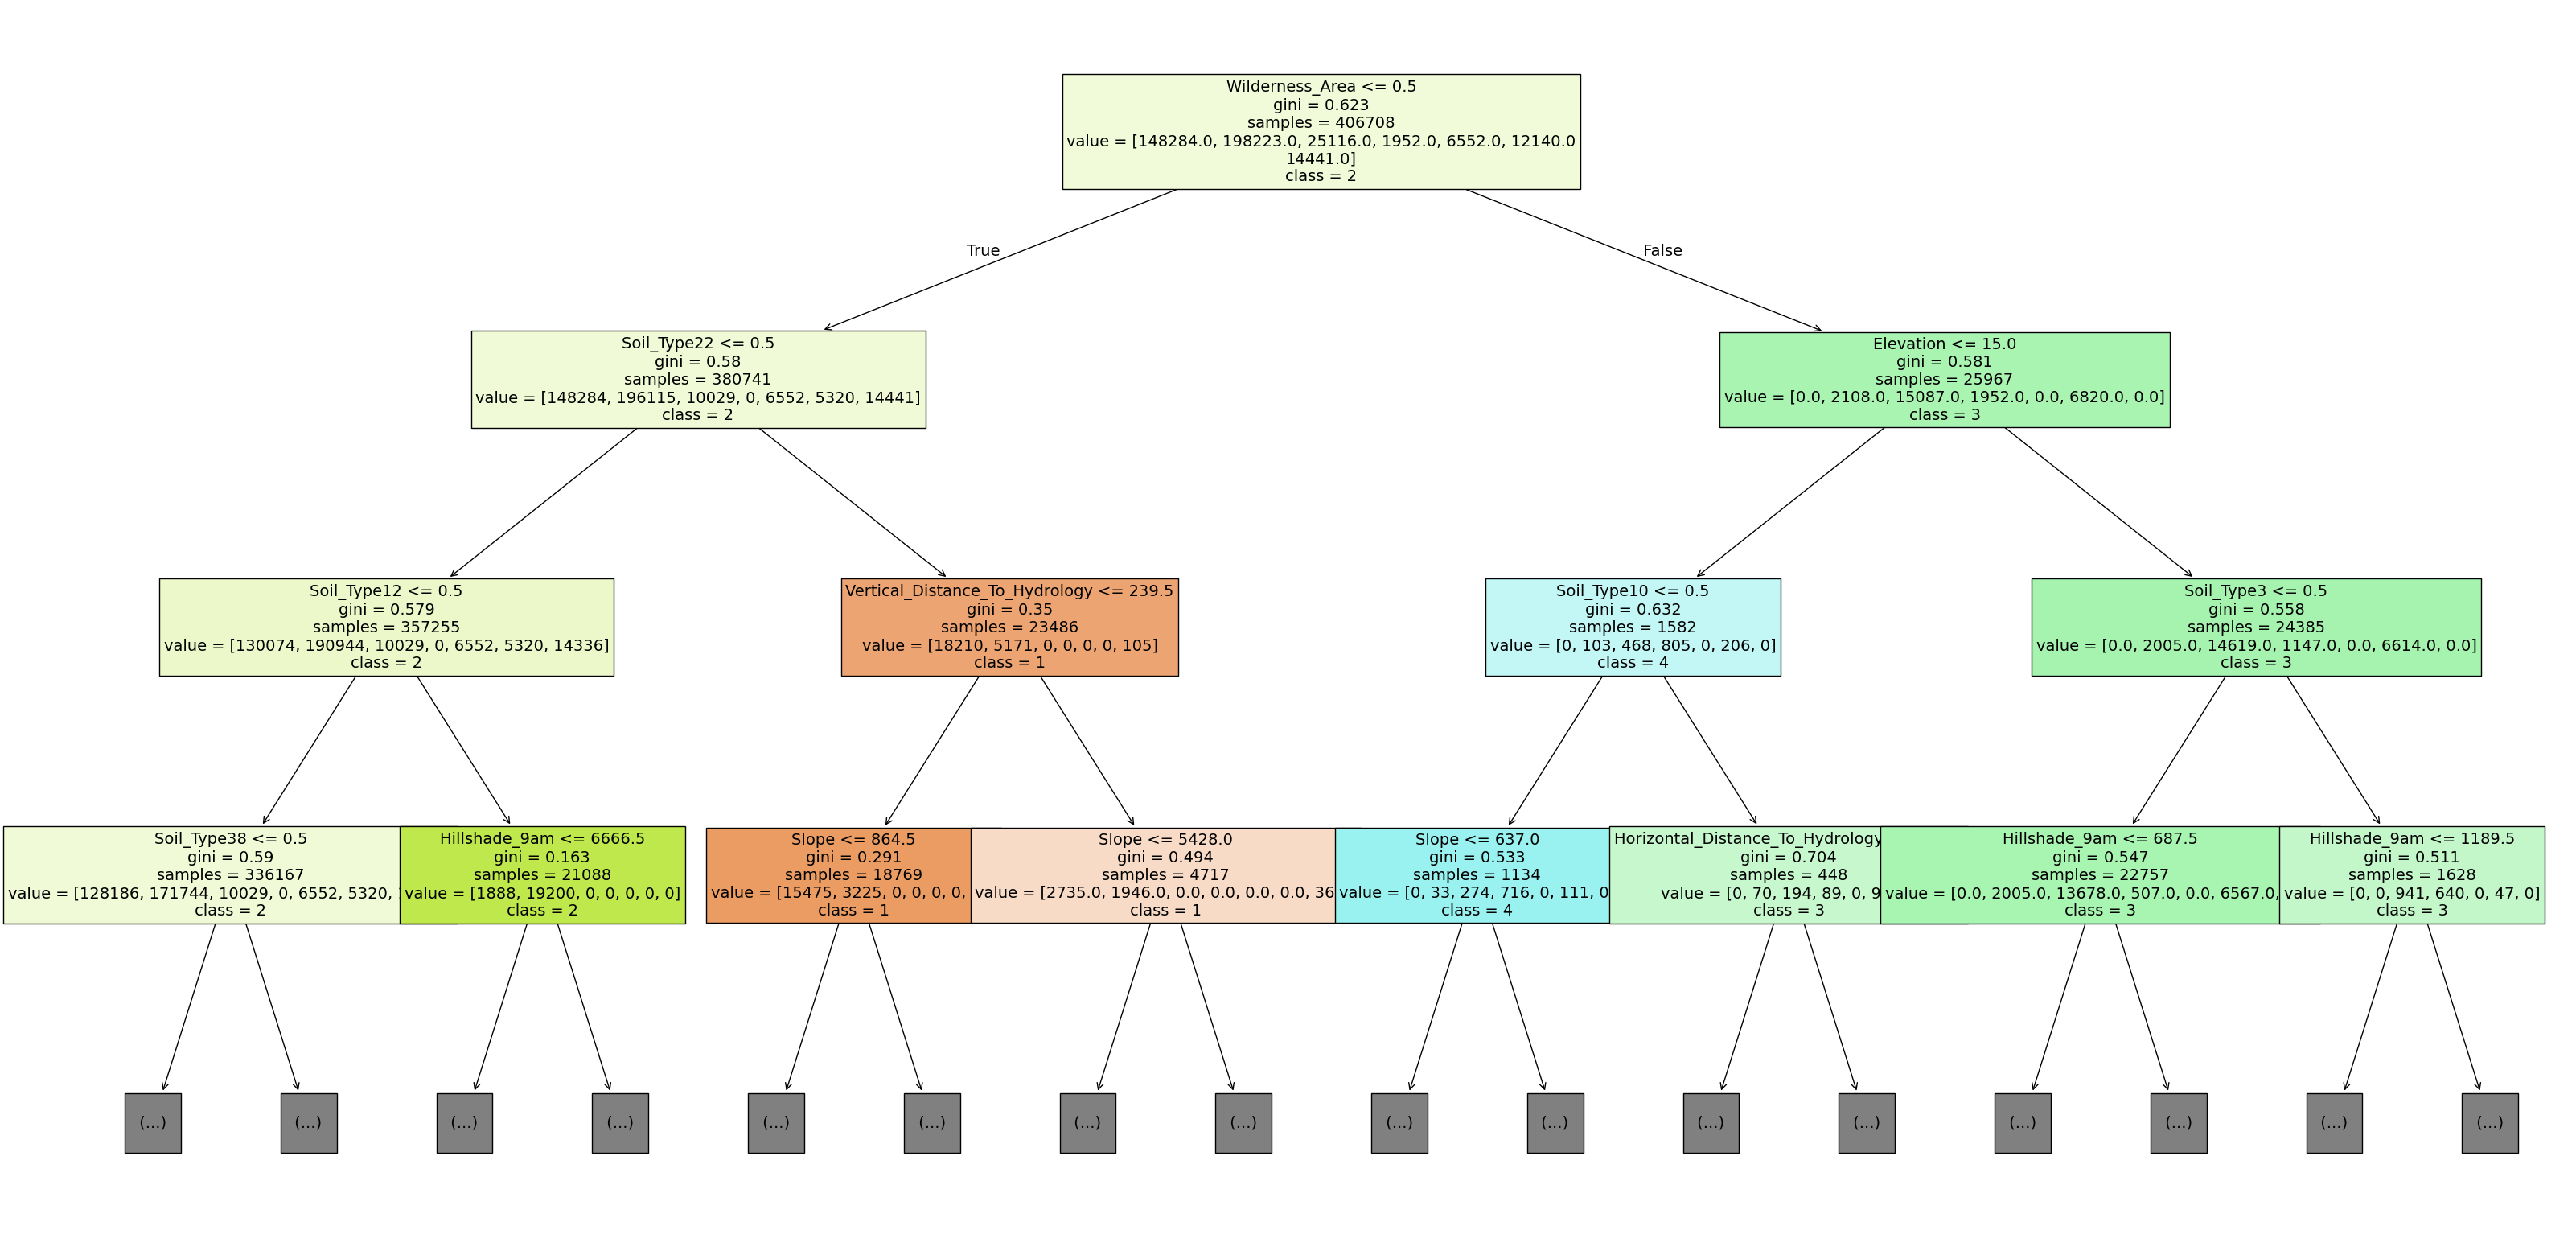

In [14]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(40, 20))  # Más grande
plot_tree(
    model, 
    max_depth=3,  # Puedes subirlo a 4 si quieres ver más profundidad
    feature_names=X.columns, 
    class_names=[str(i) for i in sorted(y.unique())], 
    filled=True,
    fontsize=14  # Aumenta el tamaño del texto
)
plt.show()


¿Qué nos dice este árbol? / What is this tree telling us?

We used a decision tree to predict vegetation types in a natural area. The tree works like a path of questions, starting with:
“Is it in Wilderness Area 1?”
and moving on to others like:
“What’s the soil type?”, “How steep is the slope?”

Following this path, the model gets it right 91.6% of the time. Beyond accuracy, it helps us see which variables matter most to understand the landscape.

This helps with:

Land use planning,

Protecting natural zones,

Making quick field decisions.


El modelo de Árbol de Decisión obtuvo una exactitud significativamente mayor (0.9092) en comparación con el modelo de K Vecinos más Cercanos (0.5820). Además, el árbol de decisión presentó mejores valores en precisión, recall y f1-score en casi todas las clases.

Esto puede deberse a que los árboles de decisión se adaptan mejor a relaciones no lineales y a estructuras jerárquicas complejas en los datos, mientras que KNN puede verse afectado negativamente por la escala de las variables y la cantidad de ruido o datos poco representativos en sus vecinos más cercanos.


The Decision Tree model achieved a significantly higher accuracy (0.9092) compared to the K-Nearest Neighbors model (0.5820). Additionally, the decision tree showed better precision, recall, and f1-score values in almost all classes.

This may be because decision trees better handle non-linear relationships and complex hierarchical structures in the data, while KNN can be negatively affected by variable scale and noisy or unrepresentative nearby instances.